<h3><center>Libraries Import</h3>

In [49]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler,Normalizer,StandardScaler
import keras
import tensorflow as tf
from keras import Sequential,layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics 

tf.random.set_seed(0)

<h3><center>Reading Dataset</h3>

In [50]:
df = pd.read_csv("/Users/kunu/Desktop/ML Experiments/1. Dataset Download/diabetes.csv")

<h3><center>Checking for imbalance data</h3>

In [51]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<h3><center>Standard Scaling the data</h3>

In [52]:
X = df.iloc[:,:8]
y = df.iloc[:,-1]

scaler = StandardScaler() # x = (x - mean_x)/std_x

X = scaler.fit_transform(X)

<h3><center>Splitting the data</h3>

In [53]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

<h3><center>Neural Network</h3>

In [54]:
def get_model():
    model = Sequential([
        keras.layers.Dense(10,activation='relu',input_shape=(8,),name='Input_Layer',kernel_initializer="RandomUniform"),
        keras.layers.Dense(15,activation='relu',name="Hidden_Layer_1"),
        keras.layers.Dense(1,activation='sigmoid',name="Output_layer")
    ])
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.002)
    model.compile(optimizer=optimiser,loss='binary_crossentropy',metrics=['accuracy'])
    return model

<h3><center>Stratified KFold Cross Validation</h3>

In [55]:
sfk = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

model = KerasClassifier(build_fn=get_model,epochs=20,verbose=0)

accuracy_score = cross_val_score(model,train_x,train_y,cv=sfk)


/var/folders/32/dhq7gf0n5yq0162cwcsynrtm0000gn/T/ipykernel_43336/2027285495.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=get_model,epochs=20,verbose=0)
2023-03-26 18:43:58.822951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 18:44:01.284836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 18:44:01.611495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 18:44:03.654272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 18:44:03.974429: I tensorflo

<h3><center>Accuracy of each fold</h3>

In [56]:
for i in range(len(accuracy_score)):
    print(f"The accuracy of fold {i+1} is: {accuracy_score[i]*100}")

print(f"The mean accuracy is: {accuracy_score.mean()*100}")

The accuracy of fold 1 is: 78.04878950119019
The accuracy of fold 2 is: 77.23577618598938
The accuracy of fold 3 is: 71.5447187423706
The accuracy of fold 4 is: 78.86179685592651
The accuracy of fold 5 is: 72.95082211494446
The mean accuracy is: 75.72838068008423


<h3><center>Model Training</h3>

In [57]:
model = get_model()

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                90        
                                                                 
 Hidden_Layer_1 (Dense)      (None, 15)                165       
                                                                 
 Output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(train_x,train_y,epochs=15,validation_split=0.2)

Epoch 1/15


2023-03-26 18:44:11.894020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 33ms/step - loss: 0.6817 - accuracy: 0.6945 - val_loss: 0.6659 - val_accuracy: 0.7480
Epoch 2/15
 1/16 [>.............................] - ETA: 0s - loss: 0.6663 - accuracy: 0.7812

2023-03-26 18:44:12.435779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 13ms/step - loss: 0.6563 - accuracy: 0.7271 - val_loss: 0.6353 - val_accuracy: 0.7561
Epoch 3/15
16/16 [==============================] - 0s 10ms/step - loss: 0.6230 - accuracy: 0.7454 - val_loss: 0.5882 - val_accuracy: 0.7724
Epoch 4/15
16/16 [==============================] - 0s 10ms/step - loss: 0.5765 - accuracy: 0.7556 - val_loss: 0.5366 - val_accuracy: 0.7480
Epoch 5/15
16/16 [==============================] - 0s 9ms/step - loss: 0.5312 - accuracy: 0.7658 - val_loss: 0.4971 - val_accuracy: 0.7561
Epoch 6/15
16/16 [==============================] - 0s 9ms/step - loss: 0.4971 - accuracy: 0.7800 - val_loss: 0.4802 - val_accuracy: 0.7805
Epoch 7/15
16/16 [==============================] - 0s 10ms/step - loss: 0.4801 - accuracy: 0.7760 - val_loss: 0.4743 - val_accuracy: 0.7724
Epoch 8/15
16/16 [==============================] - 0s 11ms/step - loss: 0.4718 - accuracy: 0.7841 - val_loss: 0.4721 - val_accuracy: 0.7967
Epoch 9/15
16/16 [========

<h3><center>Model accuracy plot</h3>

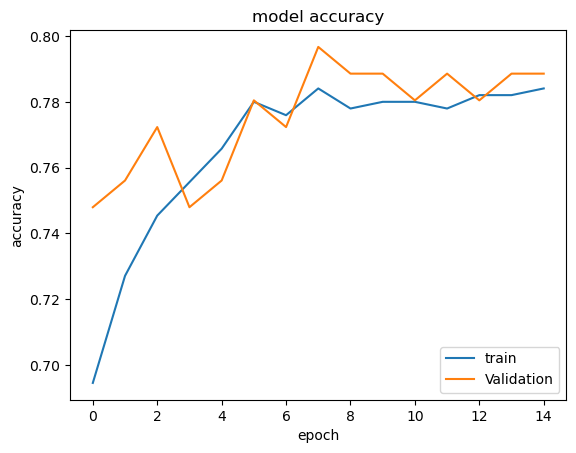

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='lower right')
plt.show()

<h3><center>Model loss plot</h3>

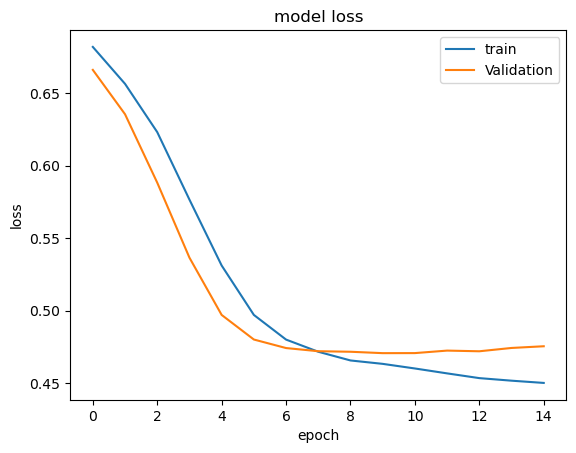

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [61]:
loss,accuracy = model.evaluate(test_x,test_y,verbose=0)
print(f"The loss is: {loss}")
print(f"The accuracy is: {accuracy}")


The loss is: 0.4382340610027313
The accuracy is: 0.7857142686843872


<h3><center>Model Predictions</h3>

In [62]:
pred_y = model.predict(test_x,verbose=0)

for i in range(len(pred_y)):
    if pred_y[i]>=0.5:
        pred_y[i]=1
    else:
        pred_y[i]=0

2023-03-26 18:44:15.115098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<h3><center>Model Classification Reports</h3>

In [63]:
print("Accuracy score is: ", metrics.accuracy_score(test_y, pred_y)*100)
print("The precision is: ",metrics.precision_score(test_y,pred_y)*100)
print("The recall is: ",metrics.recall_score(test_y,pred_y)*100)

print('\t\tClassification Report:\n', metrics.classification_report(test_y, pred_y))

Accuracy score is:  78.57142857142857
The precision is:  66.66666666666666
The recall is:  59.57446808510638
		Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       107
           1       0.67      0.60      0.63        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



<h3><center>Confusion Matrix</h3>

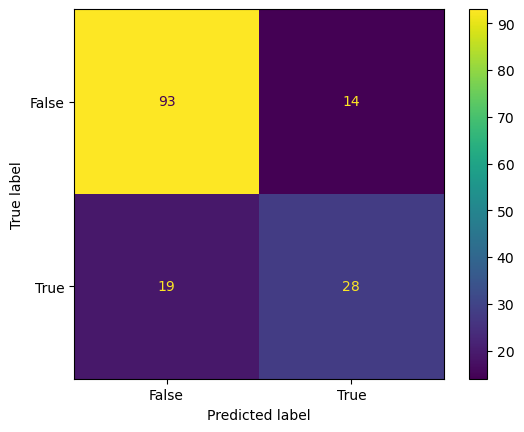

In [64]:
confusion_matrix = metrics.confusion_matrix(test_y,pred_y)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()